In [1]:
library(tidyverse)
library(cowplot)

`%+replace%` <- ggplot2::`%+replace%`

theme_zietzm <- function(base_size = 11.5, base_family = "") {
    # Starts with theme_bw and then modify some parts
    # Theme options are documentated at http://docs.ggplot2.org/current/theme.html
    ggplot2::theme_classic(base_size = base_size, base_family = base_family) %+replace%
    ggplot2::theme(

        strip.background  = ggplot2::element_rect(fill = NA, colour = 'grey90', size = 0),
        strip.text = element_text(vjust = 1, size = 10),
        plot.margin       = ggplot2::margin(t=2, r=2, b=2, l=2, unit='pt'),
        legend.spacing     = grid::unit(0.1, 'cm'),
        legend.key        = ggplot2::element_blank(),
        panel.border=element_rect(fill = NA, color = 'black', size = 0.5), 
        axis.line=element_line(size=0),
    )
}

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.2.0     ✔ purrr   0.3.2
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘cowplot’

The following object is masked from ‘package:ggplot2’:

    ggsave



In [2]:
sample_bins <- function(raw_values, edges, nbins) {
    new_data <- seq(from = min(raw_values), to = max(raw_values), length.out = nbins)
    smoothed <- loess(edges ~ raw_values) %>% predict(newdata = new_data)
    data.frame(feature_value = new_data, smoothed = smoothed)
#     assigned_bins <- cut_interval(x = smoothed, n = nbins)

#     # Split the range of values into nbins bins and take only one value from each (for plotting faster)
#     feature_values <- rep(NA, nbins)
#     smoothed_values <- rep(NA, nbins)

#     i <- 1
#     for (bin in levels(assigned_bins)) {
#         index <- which.max(assigned_bins == bin)
#         feature_values[i] <- raw_values[index]
#         smoothed_values[i] <- smoothed[index]
#         i <- i + 1
#     }
#     data.frame(feature_value = feature_values, smoothed = smoothed_values)
}

In [3]:
nbins <- 1000

loess_df <- data.frame()

for (file_path in list.files(path = 'full_priors/', pattern = '*.tsv.gz', full.names = T)) {
    metaedge <- str_extract(string = file_path, pattern = '(?<=//).*(?=.tsv.gz)')
    print(metaedge)
    
    df <- read_tsv(file_path, n_max=100000) %>% 
        select(-ends_with('id')) %>%
        mutate(edge = edge %>% as.numeric)
    
    metaedge_df <- sample_bins(df$xswap_prior, df$edge, nbins) %>% mutate(feature = 'edge_prior')
    df <- df %>% select(-xswap_prior)
    
    degree_product <- df$source_degree * df$target_degree
    analytic_prior <- degree_product / (degree_product - df$source_degree - df$target_degree
                                        + sum(df$edge) + 1)
    df <- df %>% select(-source_degree, -target_degree)
    
    scaled_degree <- degree_product / max(degree_product)
    rm(degree_product)
    metaedge_df <- bind_rows(
        metaedge_df,
        sample_bins(scaled_degree, df$edge, nbins) %>% mutate(feature = 'scaled_degree'),
    )
    rm(scaled_degree)

    metaedge_df <- bind_rows(
        metaedge_df,
        sample_bins(analytic_prior, df$edge, nbins) %>% mutate(feature = 'analytic_prior'),
    )
    rm(analytic_prior)
    
    loess_df <- bind_rows(loess_df, metaedge_df %>% mutate(metaedge = metaedge))
    rm(metaedge_df)
}

loess_df %>% head

[1] "AdG"


Parsed with column specification:
cols(
  source_id = col_double(),
  target_id = col_double(),
  edge = col_logical(),
  source_degree = col_double(),
  target_degree = col_double(),
  xswap_prior = col_double()
)


[1] "AeG"


Parsed with column specification:
cols(
  source_id = col_double(),
  target_id = col_double(),
  edge = col_logical(),
  source_degree = col_double(),
  target_degree = col_double(),
  xswap_prior = col_double()
)


[1] "AlD"


Parsed with column specification:
cols(
  source_id = col_double(),
  target_id = col_double(),
  edge = col_logical(),
  source_degree = col_double(),
  target_degree = col_double(),
  xswap_prior = col_double()
)


[1] "AuG"


Parsed with column specification:
cols(
  source_id = col_double(),
  target_id = col_double(),
  edge = col_logical(),
  source_degree = col_double(),
  target_degree = col_double(),
  xswap_prior = col_double()
)


[1] "BPpG"


Parsed with column specification:
cols(
  source_id = col_double(),
  target_id = col_double(),
  edge = col_logical(),
  source_degree = col_double(),
  target_degree = col_double(),
  xswap_prior = col_double()
)


[1] "CbG"


Parsed with column specification:
cols(
  source_id = col_double(),
  target_id = col_double(),
  edge = col_logical(),
  source_degree = col_double(),
  target_degree = col_double(),
  xswap_prior = col_double()
)
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“at  -0.0037833”Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“radius  1.4314e-05”Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“all data on boundary of neighborhood. make span bigger”Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at -0.0037833”Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 0.0037833”Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  1”Warning message in simpleLoess(y, x, w, span, degree = d

ERROR: Error in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), : NA/NaN/Inf in foreign function call (arg 5)


In [5]:
df$xswap_prior %>% n_distinct()

[1] 307

In [7]:
df %>% nrow

[1] 100000

In [ ]:
options(repr.plot.width=15, repr.plot.height=4)

(
    ggplot(loess_df, aes(x = feature_value, y = smoothed, group = metaedge, color = metaedge))
    + geom_line()
    + facet_wrap(vars(feature))
    + geom_abline(color = 'grey', linetype = 'dashed')
)

In [2]:
df <- read_tsv('full_priors//AdG.tsv.gz', n_max = 100000)

Parsed with column specification:
cols(
  source_id = col_double(),
  target_id = col_double(),
  edge = col_logical(),
  source_degree = col_double(),
  target_degree = col_double(),
  xswap_prior = col_double()
)


In [8]:
metaedge_df <- sample_bins(df$xswap_prior, df$edge, 1000) %>% mutate(feature = 'edge_prior')

In [3]:
df <- read_tsv('full_priors//AlD.tsv.gz') %>%
    mutate(
        degree_product = source_degree * target_degree,
        scaled_degree = degree_product / max(degree_product),
        analytic_prior = degree_product / (degree_product - source_degree - target_degree + sum(edge) + 1)
    ) %>%
    select(xswap_prior, scaled_degree, analytic_prior, edge)

Parsed with column specification:
cols(
  source_id = col_double(),
  target_id = col_double(),
  edge = col_logical(),
  source_degree = col_double(),
  target_degree = col_double(),
  xswap_prior = col_double()
)


In [3]:
plot_df <- df %>%
    gather('feature', 'feature_value', xswap_prior, scaled_degree, analytic_prior) %>%
    group_by(feature) %>%
    mutate(
#         edge = edge %>% as.numeric,
        smoothed = loess(edge ~ feature_value) %>% predict,
        bin = cut_interval(x = feature_value, n = 1000),
    ) %>%
    group_by(feature, bin) %>%
    sample_n(1) %>%
    ungroup()

plot_df %>% head

Warning message in mutate_impl(.data, dots, caller_env()):
“Unequal factor levels: coercing to character”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”

edge,feature,feature_value,smoothed,bin
<lgl>,<chr>,<dbl>,<dbl>,<chr>
FALSE,analytic_prior,0.001110494,0.001534734,"(0.0005726,0.001145]"
FALSE,analytic_prior,0.001665741,0.001928291,"(0.001145,0.001718]"
FALSE,analytic_prior,0.001943365,0.002126608,"(0.001718,0.002291]"
FALSE,analytic_prior,0.002498612,0.002526329,"(0.002291,0.002863]"
FALSE,analytic_prior,0.003326864,0.003130246,"(0.002863,0.003436]"
FALSE,analytic_prior,0.003886730,0.003543679,"(0.003436,0.004008]"


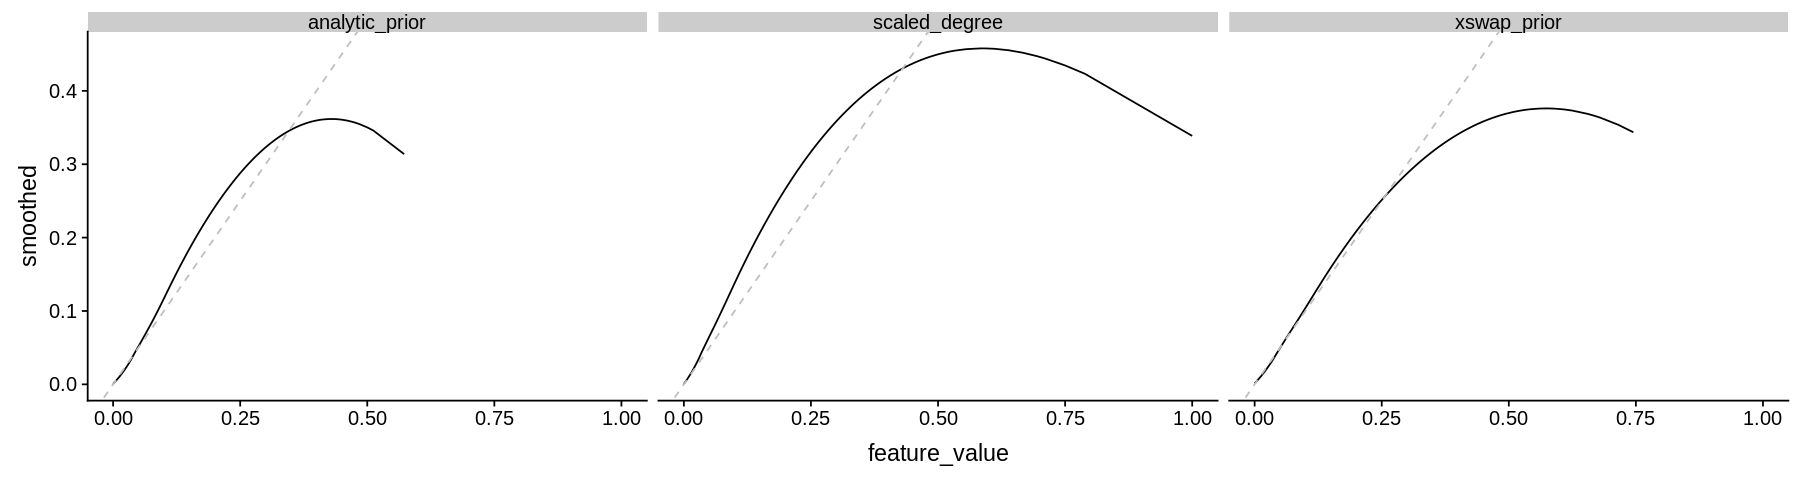

In [4]:
options(repr.plot.width=15, repr.plot.height=4)

plot_df %>%
ggplot(aes(x = feature_value, y = smoothed)) +
geom_line() +
facet_wrap(vars(feature)) +
geom_abline(color = 'grey', linetype = 'dashed')

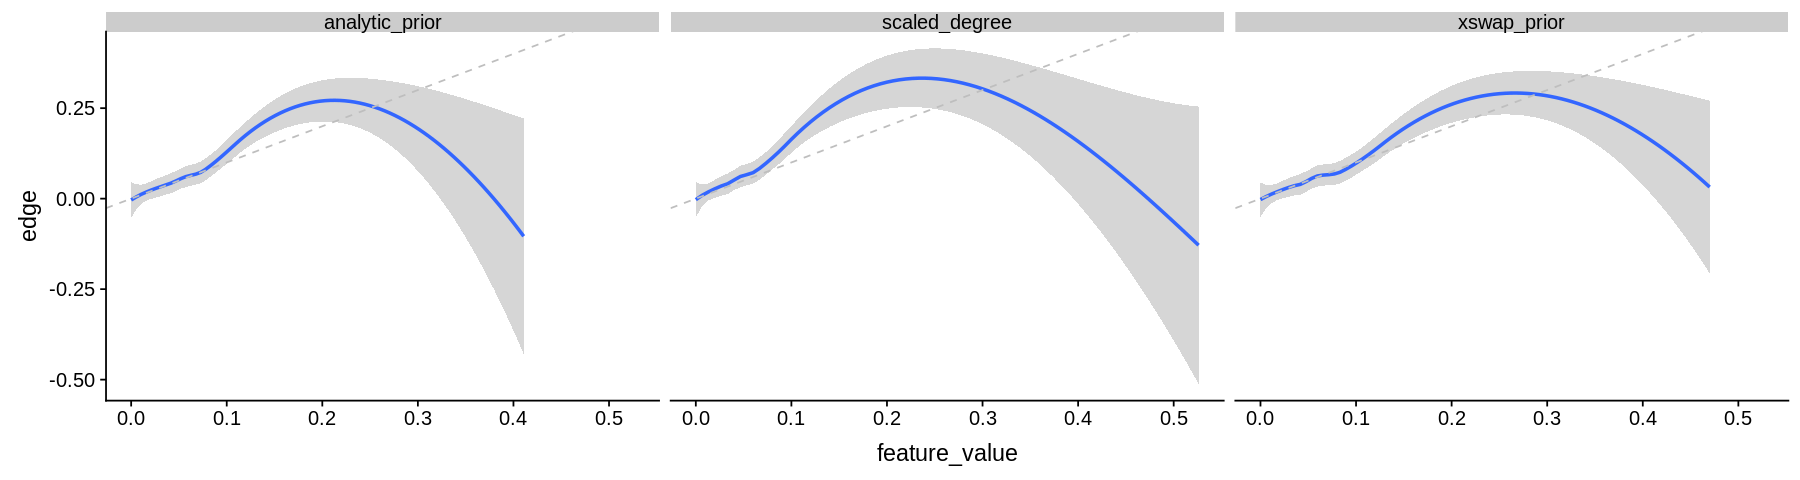

In [5]:
options(repr.plot.width=15, repr.plot.height=4)

df %>%
sample_n(1000) %>%
gather('feature', 'feature_value', xswap_prior, scaled_degree, analytic_prior) %>%
group_by(feature) %>%
ungroup() %>%
mutate(edge = edge %>% as.numeric) %>%
ggplot(aes(x = feature_value, y = edge)) +
geom_smooth(method = 'loess') +
geom_abline(color = 'grey', linetype = 'dashed') +
facet_wrap(vars(feature))

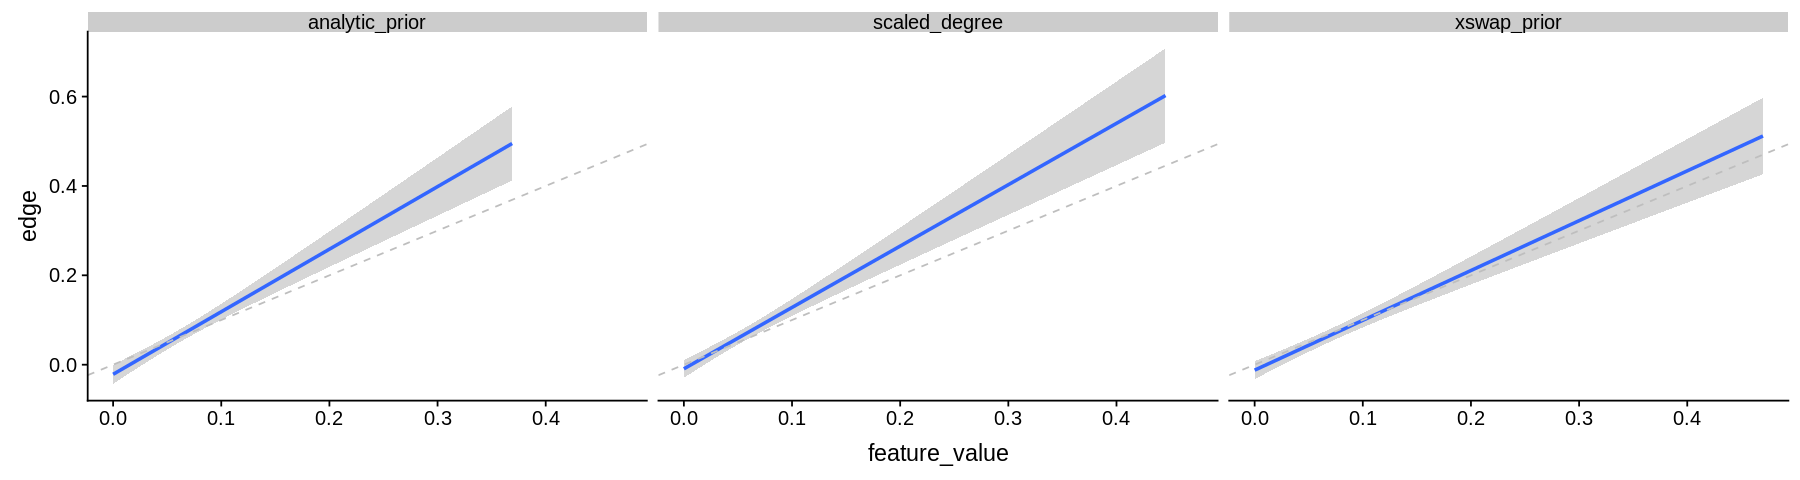

In [6]:
options(repr.plot.width=15, repr.plot.height=4)

df %>%
sample_n(1000) %>%
gather('feature', 'feature_value', xswap_prior, scaled_degree, analytic_prior) %>%
group_by(feature) %>%
ungroup() %>%
mutate(edge = edge %>% as.numeric) %>%
ggplot(aes(x = feature_value, y = edge)) +
geom_smooth(method = 'glm') +
geom_abline(color = 'grey', linetype = 'dashed') +
facet_wrap(vars(feature))

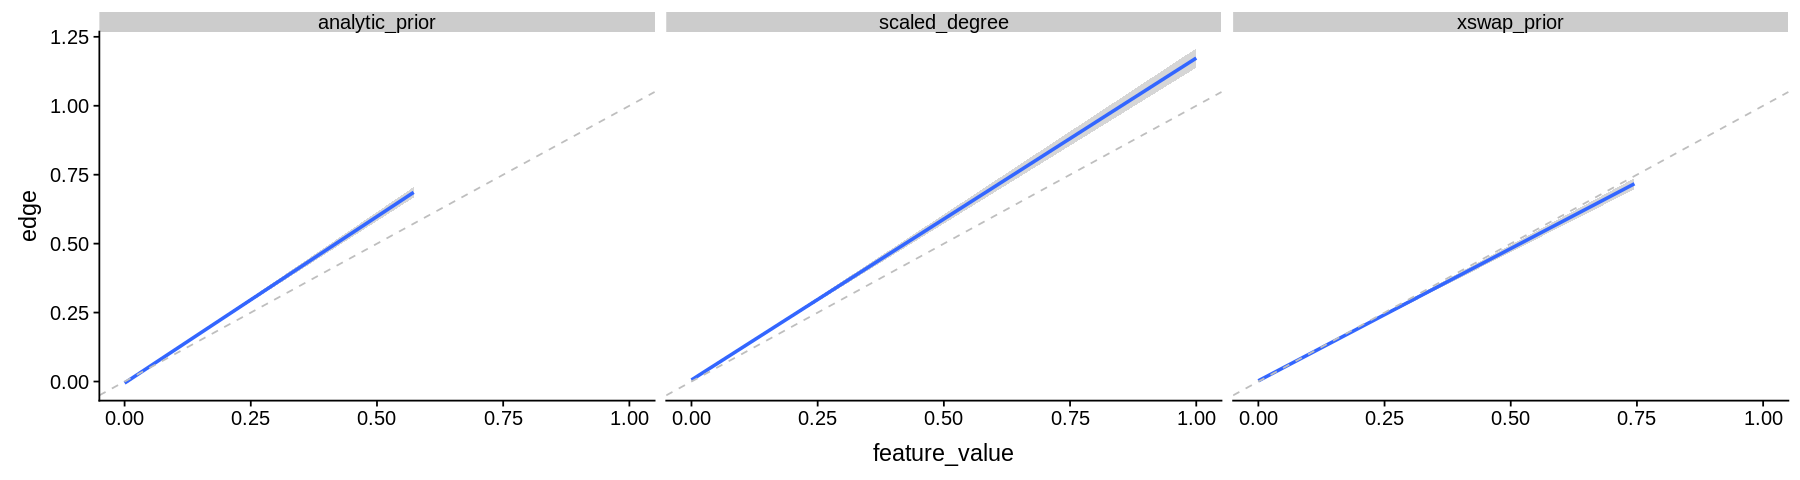

In [20]:
options(repr.plot.width=15, repr.plot.height=4)

df %>%
# sample_n(25000) %>%
gather('feature', 'feature_value', xswap_prior, scaled_degree, analytic_prior) %>%
group_by(feature) %>%
ungroup() %>%
mutate(edge = edge %>% as.numeric) %>%
ggplot(aes(x = feature_value, y = edge)) +
geom_smooth(method = 'lm') +
geom_abline(color = 'grey', linetype = 'dashed') +
facet_wrap(vars(feature))

In [35]:
df %>% head

xswap_prior,scaled_degree,analytic_prior,edge
<dbl>,<dbl>,<dbl>,<lgl>
0.006785714,0.006076389,0.007734807,FALSE
0.031190476,0.024305556,0.030335861,FALSE
0.079285714,0.056206597,0.067836564,FALSE
0.006785714,0.006076389,0.007734807,FALSE
0.000000000,0.000000000,0.000000000,FALSE
0.116428571,0.088107639,0.102941176,FALSE


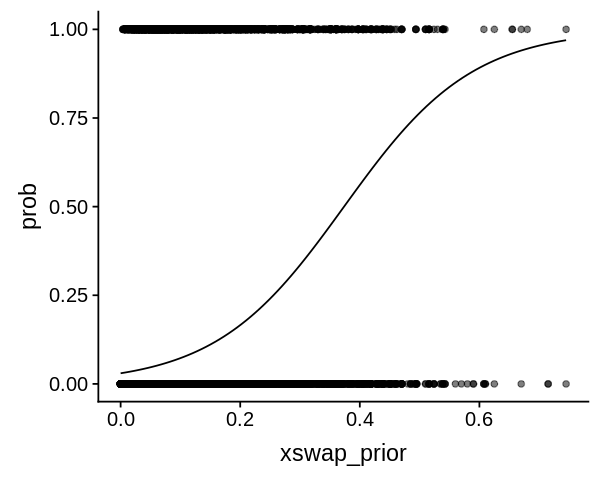

In [51]:
# fit <- glm(formula = edge ~ xswap_prior, data = df)
fit <- glm(formula = edge ~ xswap_prior, data = df, family = 'binomial')

new_data <- data.frame(
    xswap_prior = seq(from = min(df$xswap_prior), to = max(df$xswap_prior), length.out = 100)
)
new_data <- new_data %>%
    mutate(prob = fit %>% predict(newdata = new_data, type = 'response'))

options(repr.plot.width=5, repr.plot.height=4)

(
    ggplot(new_data, aes(x = xswap_prior, y = prob))
    + geom_line()
    + geom_point(data = df, aes(x = xswap_prior, y = edge %>% as.numeric), alpha = 0.5)
)